# Pymaceuticals Inc.
---

### Analysis

Through the data shown here, there is a demonstrated positive Pearson Correlation Coefficient of 0.84 for Capomulin treatment. At the 20-day point, tumor volumes have an increase from 45 mm3 to 48 mm3 before a notable decrease to 40 mm3 at the 35-day point. Capomulin has the lowest IQR (7.781), followed by Ramicane (9.098) then Infubinol (11.477) and Ceftamin (15.577). Interestingly, Capomulin and Ramicane share a similar number of observed timeponts (~230); Ketapril, Naftisol, Zoniferol, Stelasyn, Infubinol, and Ceftamin share the approximate number of observed timepoints as the Placebo (~180), with Propriva having the least amount of observed timepoints (~150). Infubinol is the only plotted therapy with an outlier data point.

A quick Google search indicates a quantitative study should have 40 participants to ensure a reasonable assurance the data is accurate. If this study has 248 participants (mice) and 10 drug therapies, that means 24.8 mice per therapy for the study. That is dramatically lower than the recommended participant ratio. I would recommend extending the study to include a larger number of participants for each drug therapy to ensure the accuracy of the data. Also, the data for mouse g989 should be evaluated to see if the data is all associated with that mouse, or if it was erroneously attributed to it
t.


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress, pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
combined_data = combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice=combined_data['Mouse ID'].value_counts()
number_of_mice=len(mice)
print(f"The number of Mouse ID in the data is {number_of_mice}.")

The number of Mouse ID in the data is 249.


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_data.loc[combined_data['Mouse ID'] == 'g989', :]
dup_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df['Mouse ID'].value_counts()
clean_number_of_mice=len(clean_mice)
print(f"The final Mouse ID count from the clean data is {clean_number_of_mice}.")

The final Mouse ID count from the clean data is 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

drug_regimens = clean_df.groupby('Drug Regimen')

mean = drug_regimens['Tumor Volume (mm3)'].mean()
median = drug_regimens['Tumor Volume (mm3)'].median()
variance = drug_regimens['Tumor Volume (mm3)'].var()
std = drug_regimens['Tumor Volume (mm3)'].std()
sem = drug_regimens['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err.': sem})

summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate=clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregate                                   

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

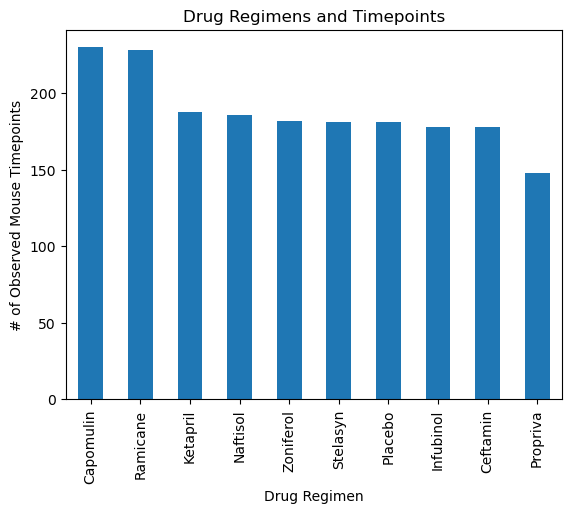

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart = clean_df['Drug Regimen'].value_counts()

plot_pandas = bar_chart.plot.bar(color='tab:blue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Drug Regimens and Timepoints')

plt.show()

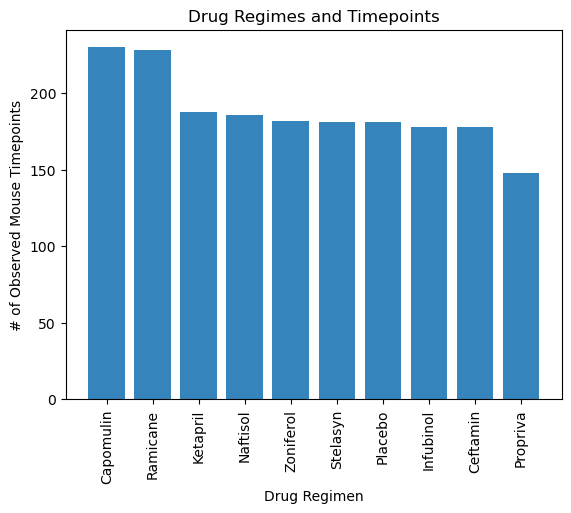

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = bar_chart.index.values
y_axis = bar_chart.values
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.90, align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.title('Drug Regimes and Timepoints')

plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64


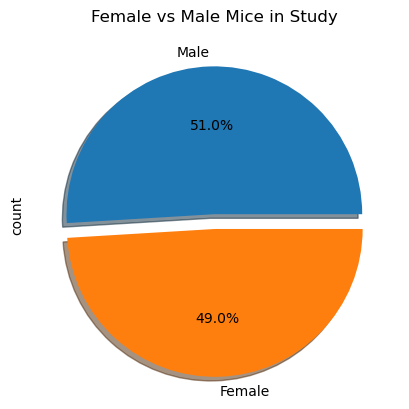

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
gender_data = clean_df['Sex'].value_counts()
print(gender_data)

gender_data.plot.pie(autopct='%1.1f%%', shadow=True, explode=(0,0.1))
plt.title('Female vs Male Mice in Study')
plt.show()

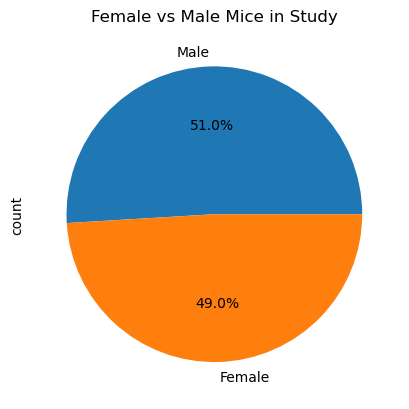

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
labels = ['Female', 'Male']
sizes = [922,958]
plot = gender_data.plot.pie(y='count', autopct='%1.1f%%')
plt.title('Female vs Male Mice in Study')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = clean_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']].reset_index()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df=clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
volume_timepoint_df = last_timepoint_df.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')
volume_timepoint_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
for treatment in drug_list:
    subset = volume_timepoint_df[volume_timepoint_df['Drug Regimen'] == treatment]
    tumor_volume_data.append(subset['Tumor Volume (mm3)'])
        
    q1 = subset['Tumor Volume (mm3)'].quantile(0.25)
    q3 = subset['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Determine outliers using upper and lower bounds
    outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    
    print(f"Treatment: {treatment}")
    print(f"The lower quartile is: {q1}")
    print(f"The upper quartile is: {q3}")
    print(f"The interquartile range is: {iqr}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Values below {(lower_bound)} could be outliers.")
    print(f"Values above {(upper_bound)} could be outliers.")
    print("------------------------------------------")

Treatment: Capomulin
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
Number of outliers: 0
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------
Treatment: Ramicane
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
Number of outliers: 0
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------
Treatment: Infubinol
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
Number of outliers: 1
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
------------------------------------------
Treatment: Ceftamin
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartil

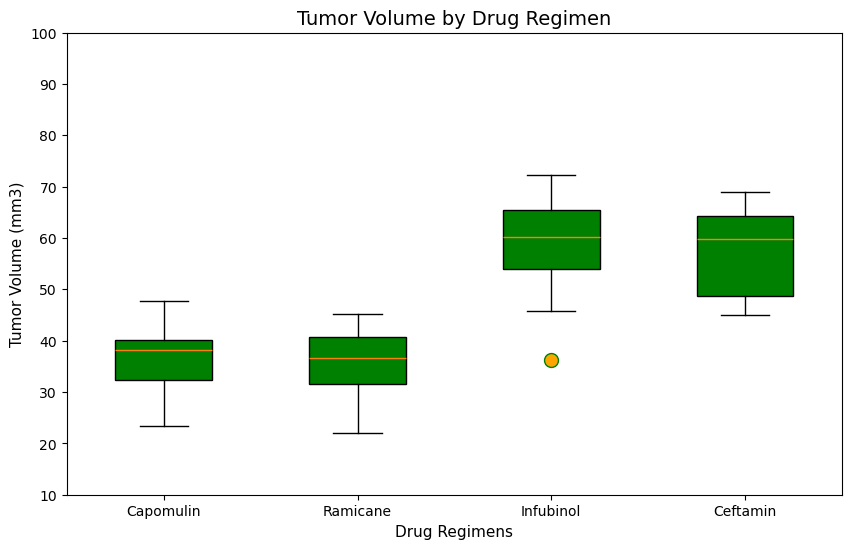

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group

plt.figure(figsize=(10, 6))  

outlier_design = dict(marker='o', markerfacecolor='orange', markersize=10, markeredgecolor='green')

plt.boxplot(tumor_volume_data, 
            widths=0.5, 
            patch_artist=True, 
            boxprops=dict(facecolor='green'), 
            flierprops=outlier_design)

plt.title('Tumor Volume by Drug Regimen', fontsize=14)
plt.xlabel('Drug Regimens', fontsize=11) 
plt.ylabel('Tumor Volume (mm3)', fontsize=11)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylim(10, 100)

plt.show()


## Line and Scatter Plots

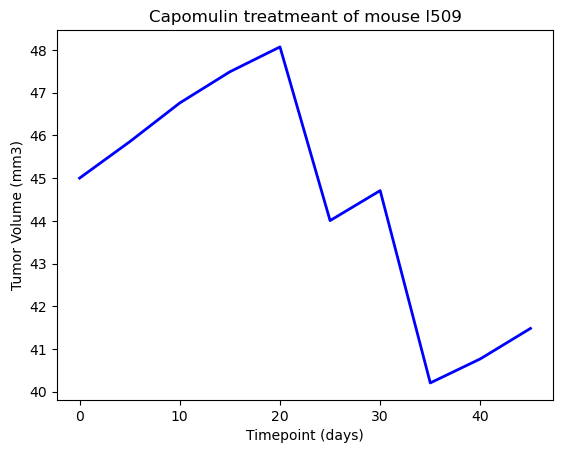

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]

lineplot_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509',:]

x_axis = lineplot_df['Timepoint']
tumorvol = lineplot_df['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumorvol, linewidth=2, color="blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


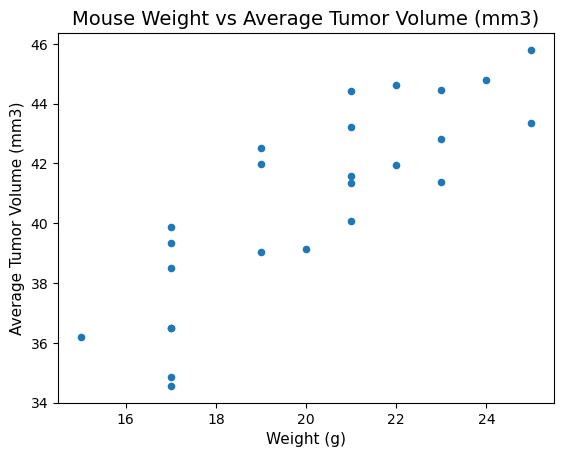

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_cap_vol = capomulin_df.groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean()

avg_cap_vol.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', marker='o') 

plt.title('Mouse Weight vs Average Tumor Volume (mm3)', fontsize=14)
plt.xlabel('Weight (g)', fontsize=11)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=11)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


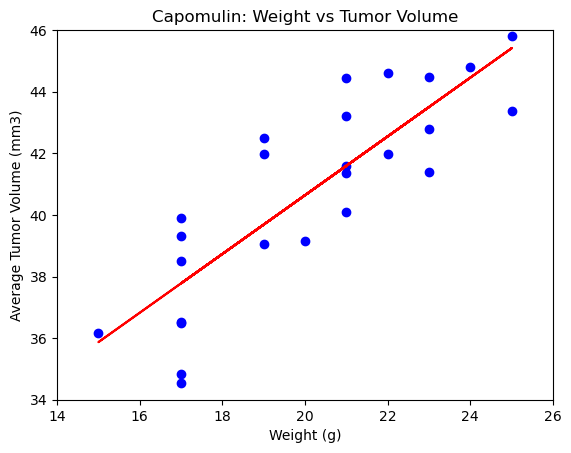

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = pearsonr(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])
regress_values = avg_cap_vol['Weight (g)'] * slope + intercept

plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'], color='blue')
plt.plot(avg_cap_vol['Weight (g)'], regress_values, color='red')
plt.xlim(14,26)
plt.ylim(34,46)
plt.title('Capomulin: Weight vs Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()